#### Дополнительная информация про Atrous convolution

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# for plot
def plot_conv2d(input, conv, output, dilation=1):
    fig, ax = plt.subplots(ncols=3, figsize=(15, 5), sharex=False, sharey=False)
    # input
    sns.heatmap(
        input[0][0],
        ax=ax[0],
        annot=True,
        fmt=".0f",
        cbar=False,
        vmin=0,
        vmax=20,
        linewidths=1,
    )
    # kernel
    sns.heatmap(
        conv.weight.detach()[0, 0, :, :],
        ax=ax[1],
        annot=True,
        fmt=".0f",
        cbar=False,
        vmin=0,
        vmax=20,
        linewidths=1,
    )
    # output
    sns.heatmap(
        output[0, 0, :, :],
        ax=ax[2],
        annot=True,
        fmt=".0f",
        cbar=False,
        vmin=0,
        vmax=20,
        linewidths=1,
    )
    # titles
    ax[0].set_title("Input \nshape: " + str(input.shape))
    ax[1].set_title("Kernel \nshape: " + str(conv.weight.shape))
    ax[2].set_title("Output \nshape: " + str(output.shape))
    fig.suptitle("Dilation = " + str(dilation), y=1.05)

    plt.show()

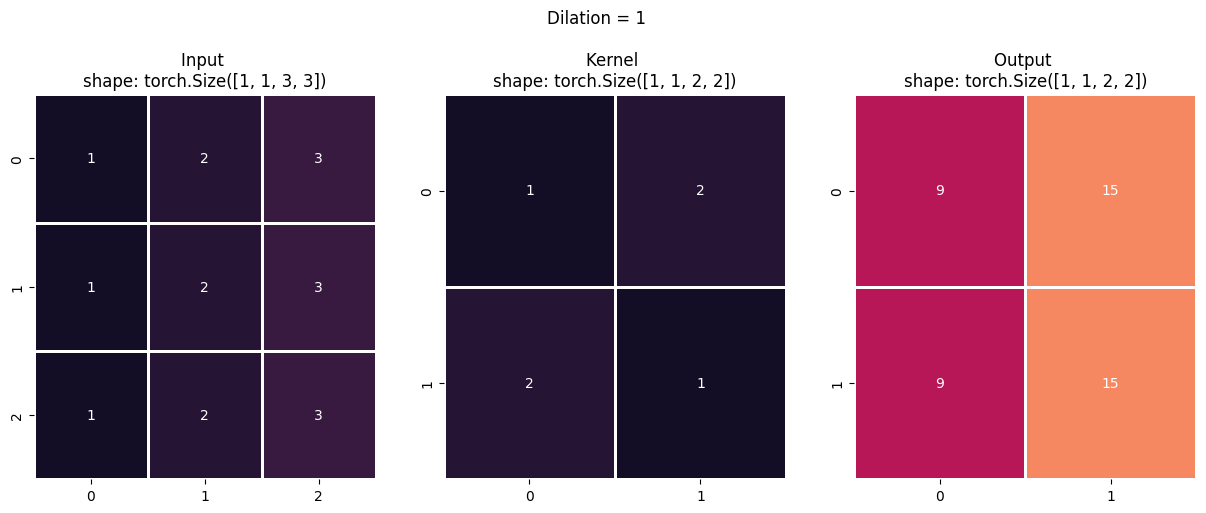

In [5]:
import torch
from torch import nn
# Atrous example
with torch.no_grad():
    # define dummy input
    # https://stackoverflow.com/questions/58584413/black-formatter-ignore-specific-multi-line-code
    # fmt: off
    input = torch.tensor([[[[1, 2, 3],
                            [1, 2, 3],
                            [1, 2, 3]]]], dtype=torch.float)
    # fmt: on
    # define conv layer, dilation = 1
    conv = nn.Conv2d(1, 1, kernel_size=2, dilation=1, bias=False)
    # define kernel weights
    conv.weight = nn.Parameter(torch.tensor([[[[1, 2], [2, 1]]]], dtype=torch.float))
    output = conv(input)
    plot_conv2d(input, conv, output, dilation=1)

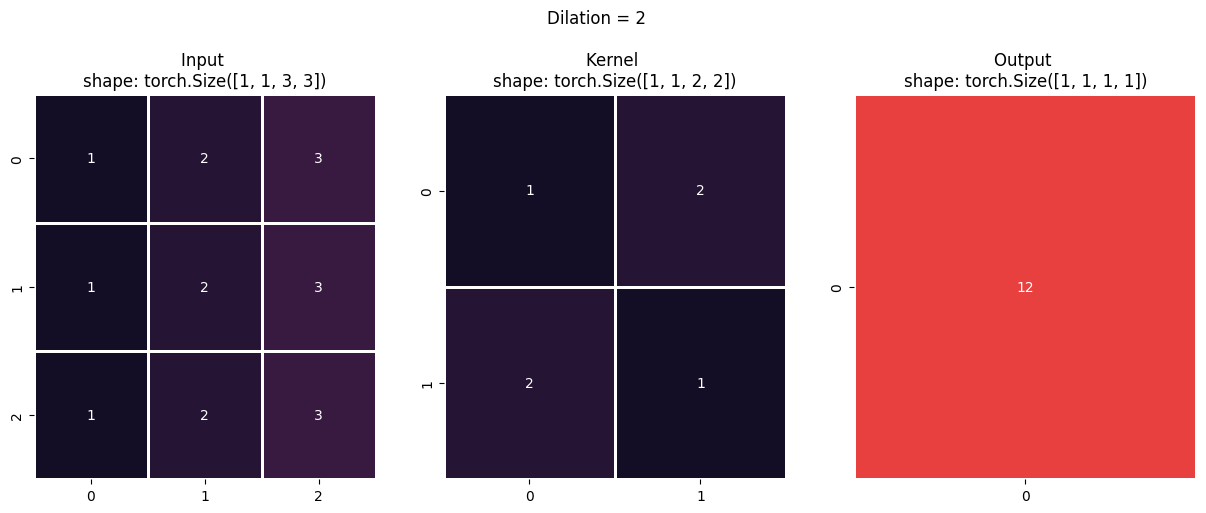

In [6]:
# change dilation to 2
with torch.no_grad():
    conv = nn.Conv2d(
        1, 1, kernel_size=2, dilation=2, bias=False
    )  # Fell free to change dilation
    conv.weight = nn.Parameter(torch.tensor([[[[1, 2], [2, 1]]]], dtype=torch.float))
    output = conv(input)
    plot_conv2d(input, conv, output, dilation=2)

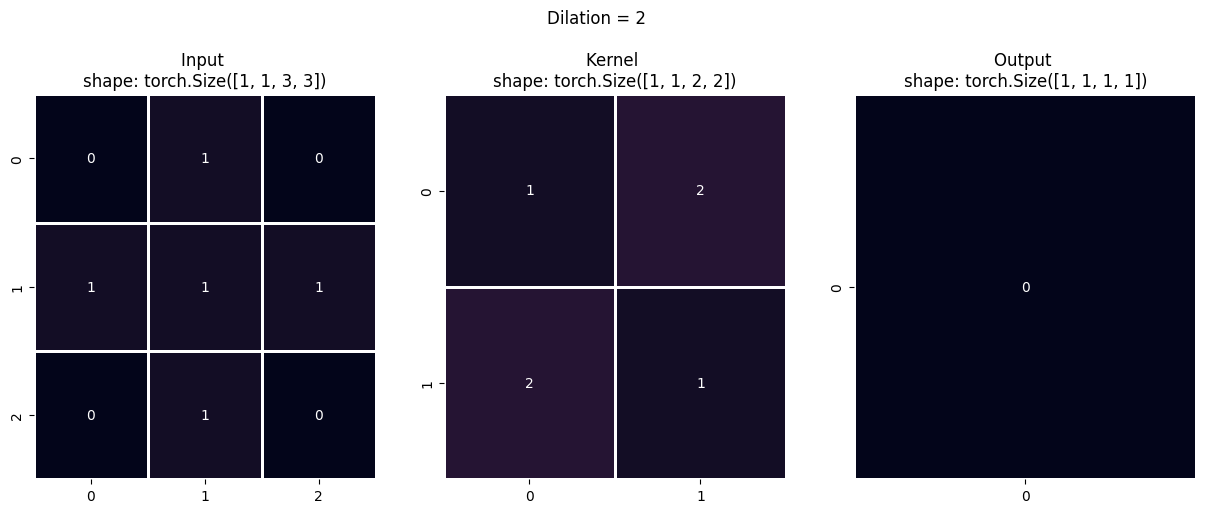

In [7]:
with torch.no_grad():
    input = torch.tensor([[[[0, 1, 0], [1, 1, 1], [0, 1, 0]]]], dtype=torch.float)
    output = conv(input)
    plot_conv2d(input, conv, output, dilation=2)